## Phase 1

### Header : Team Abheejeet Singh, Susmitha Ainampudi
#### Course Name: Data Intensive Computing
#### phase #: 1
#### term project name:  A model to predict “Air Quality” based on gases in atmosphere, winds and temperature of New York state. 

### Q Write down the following information: 
#### 1. Identify problems prevalent in public application domains. The issue(s) you are trying to address: This will be a 100-word abstract in the form of a problem statement.: 
Over the past year, the yard stick of air quality index can only display till 500 ppb(considering >300 ppb as hazardous), but a recent highest in some parts of world is increased to 900 pbb, So we see there is a necessity to know the future air quality of our New York State and can help the government to take necessary precautionary steps to control the air pollution in advance.As air quality is degrading over years, this will be helpful for government to make precautions and make people to prepare for any air pollution disasters in advance. It also let people to plan outdoor activities in advance.




#### 2. Name of your data: CarbonMonoOxide_2019,NitrogenDiOxide_2019, Ozone_2019,Relative_Humidity-2019,SulfurDiOxide_2019,Temperature_2019

#### 3. Background:
   + Source: https://aqs.epa.gov/aqsweb/documents/data_api.html, We are using a data collected by United States Environmental Protection Agency.
   + Time Period: 2019-2020
   + Scope (if there is please specified): 
   + Data Unit: 
   + Other:

#### 4 Introduction of dataset
Answer 2 questions:
+ How many columns? Show all the column labels. ((You can use pandas.DataFrame.columns to easily show all the labels of columns.)
+ What are they refering to respectively? please write in table form (markdown syntax for drawing tables : [markdown tutorial with examples](https://guides.github.com/features/mastering-markdown/))

Column Label | Description
------------ | -------------
state_code | The FIPS code of the state in which the monitor resides.
county_code | The FIPS County Code where the monitor resides.
site_number | The 4-digit number used to uniquely identify the air monitoring site within a state-county combination or tribal area.  The values are always numeric, but are treated as a string and padded with leading zeroes so they always have 4 digits.
parameter_code | The AQS code corresponding to the parameter measured by the monitor.
poc | This is the \"Parameter Occurrence Code\" used to distinguish different instruments that measure the same parameter at the same site.
latitude | The angular distance north or south of the equator measured in decimal degrees.  North is positive.
longitude | The angular distance east or west of the prime meridian measured in decimal degrees.  East is positive, West is negative..
datum | The Datum associated with the Latitude and Longitude measures.
parameter | The name or description assigned in AQS to the parameter measured by the monitor. Parameters may be pollutants or non-pollutants (e.g., wind speed).
date_local | The date the sample was taken in Local Standard Time.  This time reflects the beginning of the sample duration.  That is, if the time is 2:00 and the duration is 1-hour, then sampling happened from 2:00 - 3:00.
sample_measurement | The measured value in the standard units of measure for the parameter.
units_of_measure | The unit of measure for all statistics on the same row.  Every parameter has a standard unit of measure.  Submitters are allowed to report data in any unit and EPA converts to a standard unit so that we may use the data in calculations.
sample_duration | The length of time that air passes through the monitoring device before it is analyzed (measured). So, it represents an averaging period in the atmosphere. For continuous monitors, it can represent an averaging time of many samples.
method_type | An indication of whether the method used to collect the data is a federal reference method (FRM), equivalent to a federal reference method, an approved regional method, or none of the above (non-federal reference method).
method_code | A three-digit code representing the measurement method. A method code is only unique within a parameter (that is, method 132 for ozone is not the same as method 123 for benzene).
method | A short description of the processes, equipment, and protocols used in gathering and measuring the sample.  This field is a concatenation of the method of collection and the method of analysis.
state | The name of the state where the monitoring site is located.
county | The name of the county where the monitoring site is located.
county_code | The FIPS County Code where the monitor resides.
date_of_last_change | This represents the date the most relevant underlying data in AQS was last changed.  That is, for annual summary data, it is the date these values were last affected by a change in raw data.  If the AQCR code on the annual summary view changed, the date of last change would not be updated.
cbsa_code | The code of the core based statistical area (metropolitan area) where the monitoring site is located.
arithmetic_mean | The FIPS County Code where the monitor resides.
aqi | The Air Quality Index for the day for the pollutant, if applicable. The air quality index is a unitless measure of the amount of pollutant that can be used to relate the pollutant to the healthy levels and indicate possible health concerns with elevated levels. 
first_max_value | The highest value for the day.
first_max_hour | The time (on a 24-hour clock) when the highest value for the day was taken.
pollutant_standard | A description of the ambient air quality standard rules used to aggregate statistics. A pollutant standard will include the year of promulgation and the form of the standard.
event_type | Indicates whether data measured during exceptional events are included in the summary. 
observation_count | The number of observations (samples) taken during the averaging period.
local_site_name | The identifier of the site in the onwning agency's (e.g., not US EPA) nomenclature.
site_address | The street address giving an approximate location of the site.
city | The name of the city where the monitoring site is located. This represents the legal incorporated boundaries of cities and not urban areas.
cbsa | he name of the core based statistical area (metropolitan area) where the monitoring site is located.
validity_indicator | Flag indicating whether the Design Value is valid (calculated using data that meets completeness criteria).
observation_percent | The percent of sample values that were reported compared to the number of data values scheduled to have been reported for the 24-hour (midnight to midnight local time) period.

#### 5 Hypothesis and conclusion
 What hypothesis or conclusion do you want to study from the data?  (Remember this relative to your future phases of task)

Our project is to determine future air quality of New York’s state by analyzing the presence of carbon monoxide, Sulphur dioxide, Nitrogen dioxide, ozone over past years (2019-2020), analyzing how winds and temperatures effects the air quality and therefore finding a relation between the above parameters and air quality to determine future Air quality index.

#### 6 Write codes to load the data 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
import scipy.stats as stats
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import calendar
from matplotlib.dates import DateFormatter


In [2]:
sulfurDiOxide2019=pd.read_csv("data/SulfurDiOxide_2019.csv")
sulfurDiOxide2019.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,39137.000000,39137.0,39137.000000,39137.000000,39137.0,39137.000000,39137.000000,39137.000000,39137.000000,39137.000000,39137.000000,39137.000000,39137.000000,15716.000000,39137.000000,35524.000000
mean,19568.000000,36.0,54.144952,160.826686,42401.0,2.093134,42.602913,-75.372735,66.366329,97.872039,0.437653,1.674888,11.698393,1.810003,491.215985,31864.440941
std,11298.023079,0.0,34.756434,343.697389,0.0,1.583848,1.331558,1.922523,106.824960,8.221113,1.934337,10.288578,8.426586,9.149359,172.225215,9730.327820
min,0.000000,36.0,1.000000,2.000000,42401.0,1.000000,40.736140,-79.318810,1.000000,0.000000,-0.700000,-0.700000,0.000000,0.000000,60.000000,10580.000000
25%,9784.000000,36.0,29.000000,4.000000,42401.0,1.000000,41.455890,-76.702600,8.000000,100.000000,0.028472,0.100000,4.000000,0.000000,560.000000,27060.000000
50%,19568.000000,36.0,55.000000,5.000000,42401.0,1.000000,42.613199,-74.516250,24.000000,100.000000,0.150000,0.300000,11.000000,0.000000,560.000000,35620.000000
75%,29352.000000,36.0,89.000000,110.000000,42401.0,3.000000,43.449570,-73.821530,24.000000,100.000000,0.320833,0.700000,21.000000,0.000000,560.000000,36300.000000
max,39136.000000,36.0,109.000000,1015.000000,42401.0,5.000000,44.965412,-73.057540,288.000000,100.000000,52.741667,443.200000,23.000000,105.000000,560.000000,46540.000000


In [3]:
ozoneData2019=pd.read_csv("data/Ozone_2019.csv")
ozoneData2019.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,39721.000000,39721.0,39721.000000,39721.000000,39721.0,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,39721.000000,29779.000000,39721.000000,34292.000000
mean,19860.000000,36.0,63.287757,1180.316508,44201.0,1.093704,42.243807,-75.009351,21.788525,97.967725,0.030081,0.039091,10.924775,35.903220,82.630523,32264.406859
std,11466.609358,0.0,35.342500,2691.056539,0.0,0.390123,1.218591,1.834932,3.397676,7.696605,0.009155,0.010456,5.138057,11.651047,12.477607,10184.493546
min,0.000000,36.0,1.000000,2.000000,44201.0,1.000000,40.580270,-79.318810,1.000000,4.000000,0.000824,0.003000,0.000000,3.000000,47.000000,10580.000000
25%,9930.000000,36.0,31.000000,4.000000,44201.0,1.000000,40.960780,-76.463240,17.000000,100.000000,0.023542,0.032000,9.000000,29.000000,87.000000,27460.000000
50%,19860.000000,36.0,67.000000,9.000000,44201.0,1.000000,42.400600,-74.028190,24.000000,100.000000,0.030118,0.038000,11.000000,35.000000,87.000000,35620.000000
75%,29790.000000,36.0,101.000000,1006.000000,44201.0,1.000000,43.223860,-73.757330,24.000000,100.000000,0.036667,0.046000,13.000000,42.000000,87.000000,35620.000000
max,39720.000000,36.0,119.000000,9991.000000,44201.0,3.000000,44.393080,-72.712380,24.000000,100.000000,0.064333,0.118000,23.000000,150.000000,87.000000,48060.000000


In [4]:
NitrogenDiOxide2019=pd.read_csv("data/NitrogenDiOxide_2019.csv")
NitrogenDiOxide2019.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,5412.000000,5412.0,5412.000000,5412.000000,5412.0,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000,5412.000000
mean,2705.500000,36.0,46.410200,74.193644,42602.0,1.246859,41.661691,-75.558180,23.097191,96.251293,11.684832,23.028936,11.446046,21.283075,203.883592,31060.162602
std,1562.454159,0.0,33.420395,52.817265,0.0,0.657920,1.063890,2.286769,2.489485,10.367006,7.181306,12.455802,8.112921,11.786074,175.782506,9352.997931
min,0.000000,36.0,5.000000,5.000000,42602.0,1.000000,40.736140,-78.809526,3.000000,13.000000,0.689474,1.100000,0.000000,1.000000,74.000000,15380.000000
25%,1352.750000,36.0,5.000000,15.000000,42602.0,1.000000,40.739264,-78.765825,24.000000,100.000000,6.408333,13.000000,5.000000,12.000000,74.000000,15380.000000
50%,2705.500000,36.0,29.000000,110.000000,42602.0,1.000000,40.867900,-73.902000,24.000000,100.000000,10.092654,21.100000,8.000000,20.000000,99.000000,35620.000000
75%,4058.250000,36.0,81.000000,125.000000,42602.0,1.000000,42.921107,-73.821530,24.000000,100.000000,15.445833,31.400000,20.000000,29.000000,212.000000,35620.000000
max,5411.000000,36.0,103.000000,133.000000,42602.0,3.000000,43.145013,-73.139046,24.000000,100.000000,48.200000,67.200000,23.000000,65.000000,574.000000,40380.000000


In [5]:
carbonMonoOxide2019=pd.read_csv("data/CarbonMonoOxide_2019.csv")
carbonMonoOxide2019.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,7205.000000,7205.0,7205.000000,7205.000000,7205.0,7205.0,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,7205.000000,3603.000000,7205.000000,7205.000000
mean,3602.000000,36.0,49.900208,158.033449,42101.0,1.0,41.998873,-75.922121,23.342540,97.286051,0.243779,0.350589,8.485496,3.426034,530.324774,28317.498959
std,2080.048677,0.0,31.593065,287.927349,0.0,0.0,1.028560,2.123501,2.222138,9.228028,0.084768,0.181306,8.321798,1.785020,167.763177,11148.629006
min,0.000000,36.0,1.000000,3.000000,42101.0,1.0,40.736140,-78.809526,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,54.000000,10580.000000
25%,1801.000000,36.0,29.000000,12.000000,42101.0,1.0,40.819760,-77.557280,24.000000,100.000000,0.200000,0.213000,0.000000,2.000000,593.000000,15380.000000
50%,3602.000000,36.0,55.000000,124.000000,42101.0,1.0,42.091420,-77.209780,24.000000,100.000000,0.226087,0.300000,6.000000,3.000000,593.000000,35620.000000
75%,5403.000000,36.0,81.000000,133.000000,42101.0,1.0,42.921107,-73.821530,24.000000,100.000000,0.280583,0.400000,17.000000,5.000000,593.000000,35620.000000
max,7204.000000,36.0,101.000000,1007.000000,42101.0,1.0,43.146180,-73.757330,24.000000,100.000000,1.004125,2.857000,23.000000,17.000000,593.000000,40380.000000


In [6]:
TemperatureDf=pd.read_csv("data/Temperature_2019.csv")
TemperatureDf.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,3117.000000,3117.0,3117.000000,3117.000000,3117.0,3117.0,3117.000000,3117.000000,0.0,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,0.0,3117.0,2813.000000
mean,1558.000000,36.0,62.553417,834.453321,62101.0,1.0,41.789968,-75.180384,NaN,23.942573,99.763555,50.324919,58.784087,12.538017,NaN,40.0,33667.522218
std,899.944721,0.0,33.687200,1504.509175,0.0,0.0,0.956640,1.942322,NaN,0.731801,3.036932,19.524877,20.758280,4.497494,NaN,0.0,6326.437901
min,0.000000,36.0,5.000000,3.000000,62101.0,1.0,40.736140,-79.318810,NaN,3.000000,13.000000,-8.583333,-3.000000,0.000000,NaN,40.0,18500.000000
25%,779.000000,36.0,41.000000,5.000000,62101.0,1.0,40.867900,-77.209780,NaN,24.000000,100.000000,34.125000,41.000000,12.000000,NaN,40.0,35620.000000
50%,1558.000000,36.0,67.000000,124.000000,62101.0,1.0,41.523750,-74.215340,NaN,24.000000,100.000000,52.875000,62.000000,13.000000,NaN,40.0,35620.000000
75%,2337.000000,36.0,81.000000,1007.000000,62101.0,1.0,42.499630,-73.763660,NaN,24.000000,100.000000,67.583333,77.000000,15.000000,NaN,40.0,35620.000000
max,3116.000000,36.0,119.000000,5001.000000,62101.0,1.0,43.449570,-73.585490,NaN,24.000000,100.000000,90.958333,99.000000,23.000000,NaN,40.0,45060.000000


In [7]:
HumidityDf=pd.read_csv("data/Relative_Humidity-2019.csv")
HumidityDf.describe()

,Unnamed: 0,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,pollutant_standard,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,method_code,cbsa_code
count,1550.000000,1550.0,1550.000000,1550.000000,1550.0,1550.000000,1550.000000,1550.000000,0.0,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,0.0,1550.0,1550.000000
mean,774.500000,36.0,61.269677,555.710968,62201.0,1.176129,41.691970,-75.696012,NaN,23.392903,97.481290,69.007641,86.820645,8.509677,NaN,11.0,32458.580645
std,447.590773,0.0,41.335698,761.973384,0.0,0.381053,0.910629,2.148074,NaN,2.407987,10.012741,14.711030,12.802824,8.349273,NaN,0.0,7327.099610
min,0.000000,36.0,5.000000,3.000000,62201.0,1.000000,40.743160,-79.318810,NaN,3.000000,13.000000,19.375000,28.000000,0.000000,NaN,11.0,18500.000000
25%,387.250000,36.0,13.000000,5.000000,62201.0,1.000000,40.867900,-77.548170,NaN,24.000000,100.000000,59.145833,83.000000,2.000000,NaN,11.0,27460.000000
50%,774.500000,36.0,59.000000,133.000000,62201.0,1.000000,41.051920,-73.878090,NaN,24.000000,100.000000,70.708333,92.000000,5.000000,NaN,11.0,35620.000000
75%,1161.750000,36.0,101.000000,1007.000000,62201.0,1.000000,42.499630,-73.763660,NaN,24.000000,100.000000,80.322917,95.000000,18.000000,NaN,11.0,35620.000000
max,1549.000000,36.0,119.000000,2004.000000,62201.0,2.000000,43.146180,-73.585490,NaN,24.000000,100.000000,98.875000,99.000000,23.000000,NaN,11.0,40380.000000


#### 7 IDA (Initial Data Analysis) 
[reference to do IDA](https://www.sciencedirect.com/science/article/pii/S0022522315017948)  \\
Please specify what you've done (text and code) for each operation (at least 10 operations). If some steps will produce a picture, please show this picture


# Checking correlation between the columns of the data sets

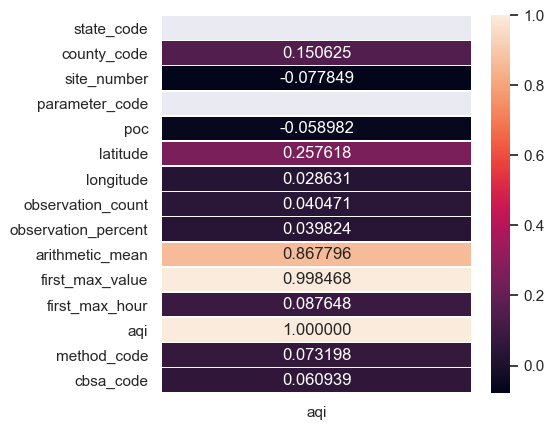

In [8]:

corr=sulfurDiOxide2019[sulfurDiOxide2019.columns[1:]].corr()
x=corr.columns
corr=corr[['aqi']]
sns.set_theme()
fig, ax = plt.subplots(figsize=(5,5))   
ax = sns.heatmap(corr,annot=True, fmt="f",linewidth=0.5,ax=ax)

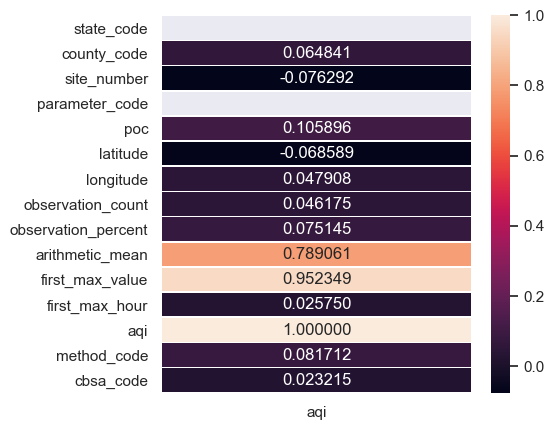

In [9]:
corr=ozoneData2019[ozoneData2019.columns[1:]].corr()
x=corr.columns
corr=corr[['aqi']]
sns.set_theme()
fig, ax = plt.subplots(figsize=(5,5))   
ax = sns.heatmap(corr,annot=True, fmt="f",linewidth=0.5,ax=ax)

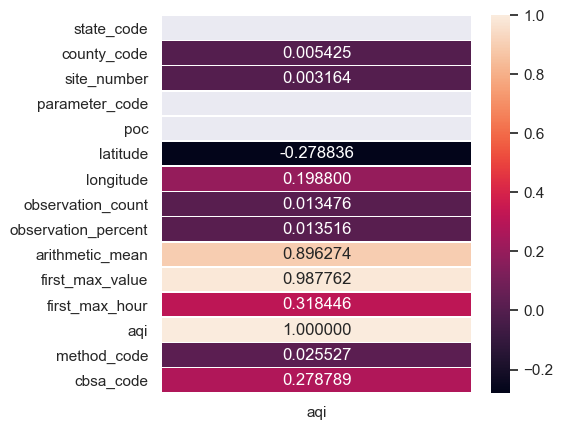

In [10]:
corr=carbonMonoOxide2019[carbonMonoOxide2019.columns[1:]].corr()
x=corr.columns
corr=corr[['aqi']]
sns.set_theme()
fig, ax = plt.subplots(figsize=(5,5))   
ax = sns.heatmap(corr,annot=True, fmt="f",linewidth=0.5,ax=ax)

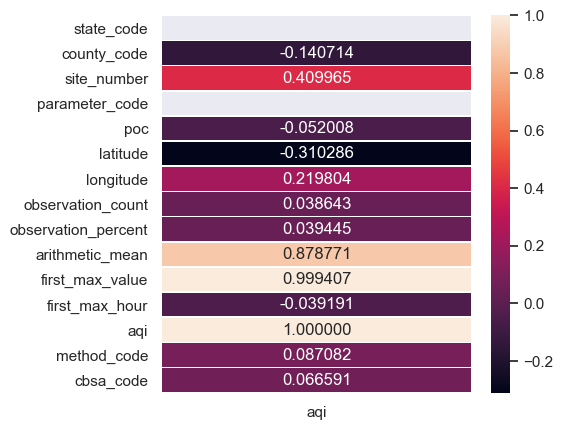

In [11]:
corr=NitrogenDiOxide2019[NitrogenDiOxide2019.columns[1:]].corr()
x=corr.columns
corr=corr[['aqi']]
sns.set_theme()
fig, ax = plt.subplots(figsize=(5,5))   
ax = sns.heatmap(corr,annot=True, fmt="f",linewidth=0.5,ax=ax)

#### 1. Removing Columns

Columns are chosen on the basis of the correlation measured and their probale usage in the next phases.

In [12]:
def removeColumns(dataFrame):
    return dataFrame[['date_local','site_number','parameter','sample_duration','pollutant_standard',
                                'validity_indicator','arithmetic_mean','first_max_value','aqi',
                                'local_site_name','county','state','latitude','longitude']].copy() 



#sulfur
sulfurDiOxide2019New=removeColumns(sulfurDiOxide2019)
print("Sulfur Shape : " + str(sulfurDiOxide2019New.shape))

#Ozone
ozoneData2019New=removeColumns(ozoneData2019)
print("Ozone Shape : " + str(ozoneData2019New.shape))

#Nitrogen
NitrogenDiOxide2019New=removeColumns(NitrogenDiOxide2019)
print("NitrogenDiOxide Shape : " + str(NitrogenDiOxide2019New.shape))

#CarbonMonoOxide
carbonMonoOxide2019New=removeColumns(carbonMonoOxide2019)
print("CarbonMonoOxide Shape : " + str(carbonMonoOxide2019New.shape))

#Temperature
TemperatureDfNew=removeColumns(TemperatureDf)
print("Temperature Shape : " + str(TemperatureDfNew.shape))

#Humidity
HumidityDfNew=removeColumns(HumidityDf)
print("Relative Humidity Shape : "+ str(HumidityDfNew.shape))    

Sulfur Shape : (39137, 14)
Ozone Shape : (39721, 14)
NitrogenDiOxide Shape : (5412, 14)
CarbonMonoOxide Shape : (7205, 14)
Temperature Shape : (3117, 14)
Relative Humidity Shape : (1550, 14)


#### 2. Removing Rows

The rows are filtered on the basis of 2 variables

1. validity_indicator - This indicates whether the sample is valid. This has two possible values 'Y' and 'N'. We are discarding the rows with values as 'N'.

2. pollutant_standard - For each pollutant there are various standards defined for measurement and recording of data.We are  choosing only 1 standard for each pollutant. 

In [13]:
def rowRemovalUsingPollutantStandard(dataFrame,pollutantStandard):
    return dataFrame[dataFrame['pollutant_standard'] == pollutantStandard]

def rowRemovalUsingValidityIndicator(dataFrame):
    return dataFrame[dataFrame['validity_indicator'] == "Y"] 
    



#removing rows using pollutant_standard used to measure 

sulfurDiOxide2019New = rowRemovalUsingPollutantStandard(sulfurDiOxide2019New,"SO2 1-hour 2010")

ozoneData2019New =rowRemovalUsingPollutantStandard(ozoneData2019New,"Ozone 8-hour 2015")

NitrogenDiOxide2019New = rowRemovalUsingPollutantStandard(NitrogenDiOxide2019New,"NO2 1-hour") 

carbonMonoOxide2019New = rowRemovalUsingPollutantStandard(carbonMonoOxide2019New,"CO 8-hour 1971") 


#removing Rows using validity_indicator

sulfurDiOxide2019New = rowRemovalUsingValidityIndicator(sulfurDiOxide2019New)

ozoneData2019New = rowRemovalUsingValidityIndicator(ozoneData2019New)

NitrogenDiOxide2019New = rowRemovalUsingValidityIndicator(NitrogenDiOxide2019New) 

carbonMonoOxide2019New = rowRemovalUsingValidityIndicator(carbonMonoOxide2019New)

TemperatureDfNew = rowRemovalUsingValidityIndicator(TemperatureDfNew) 

HumidityDfNew = rowRemovalUsingValidityIndicator(HumidityDfNew)

print("Sulfur Shape : " + str(sulfurDiOxide2019New.shape)) 
print("Ozone Shape : " + str(ozoneData2019New.shape))
print("NitrogenDiOxide Shape : " + str(NitrogenDiOxide2019New.shape))
print("CarbonMonoOxide Shape : " + str(carbonMonoOxide2019New.shape))
print("Temperature Shape : " + str(TemperatureDfNew.shape))
print("Relative Humidity Shape : "+ str(HumidityDfNew.shape))

Sulfur Shape : (7783, 14)
Ozone Shape : (9671, 14)
NitrogenDiOxide Shape : (2626, 14)
CarbonMonoOxide Shape : (3603, 14)
Temperature Shape : (3108, 14)
Relative Humidity Shape : (1486, 14)


#### 3. Duplicate Check

Checking for duplicates in the dataset using a combination of rows.

In [14]:
def duplicateCheck(dataFrame,DataSetName):
    duplicate = dataFrame[dataFrame.duplicated(['date_local','local_site_name','arithmetic_mean','first_max_value','aqi'])] 
    if duplicate.empty:
        print(DataSetName + " has no duplicate Values.")


duplicateCheck(sulfurDiOxide2019New, "SulfurDiOxide Data Set")        
duplicateCheck(ozoneData2019New, "OzoneDataSet Data Set")        
duplicateCheck(NitrogenDiOxide2019New, "NitrogenDiOxide Data Set")        
duplicateCheck(carbonMonoOxide2019New, "CarobonMonoOxide Data Set")        
duplicateCheck(TemperatureDfNew, "Temperature Data Set")        
duplicateCheck(HumidityDfNew, "Relative Humidity Data Set") 

SulfurDiOxide Data Set has no duplicate Values.
OzoneDataSet Data Set has no duplicate Values.
NitrogenDiOxide Data Set has no duplicate Values.
CarobonMonoOxide Data Set has no duplicate Values.
Temperature Data Set has no duplicate Values.
Relative Humidity Data Set has no duplicate Values.


#### 4. Parsing Dates

The dates are stored as object type currently. We need to convert this to dateTime64 type. This is helpful in the next operations of phase 1. Also this would be helpful in the future phases as weel.

In [15]:
#converting the date_local column which stores the dates on which readings were taken to dateTime64 type

def parseDates(dataFrame):
    dataFrame['date_local']=pd.to_datetime(dataFrame['date_local'])
    return dataFrame


sulfurDiOxide2019New=parseDates(sulfurDiOxide2019New)
ozoneData2019New=parseDates(ozoneData2019New)
NitrogenDiOxide2019New=parseDates(NitrogenDiOxide2019New)
carbonMonoOxide2019New=parseDates(carbonMonoOxide2019New)
TemperatureDfNew=parseDates(TemperatureDfNew)
HumidityDfNew=parseDates(HumidityDfNew)


#### 5. Removing Outliers

Checking and removing the outliers from the datasets.
Used robust z-score method to identify and remove the outliers.
Below is a scatter plot for some datasets to show the outliers.
Added the example before and after graphs for SulfurDiOxide and Ozone.
Ozone does not have many outliers , so not much change in that, but you can see the y-axis change for sulfurdioxide  

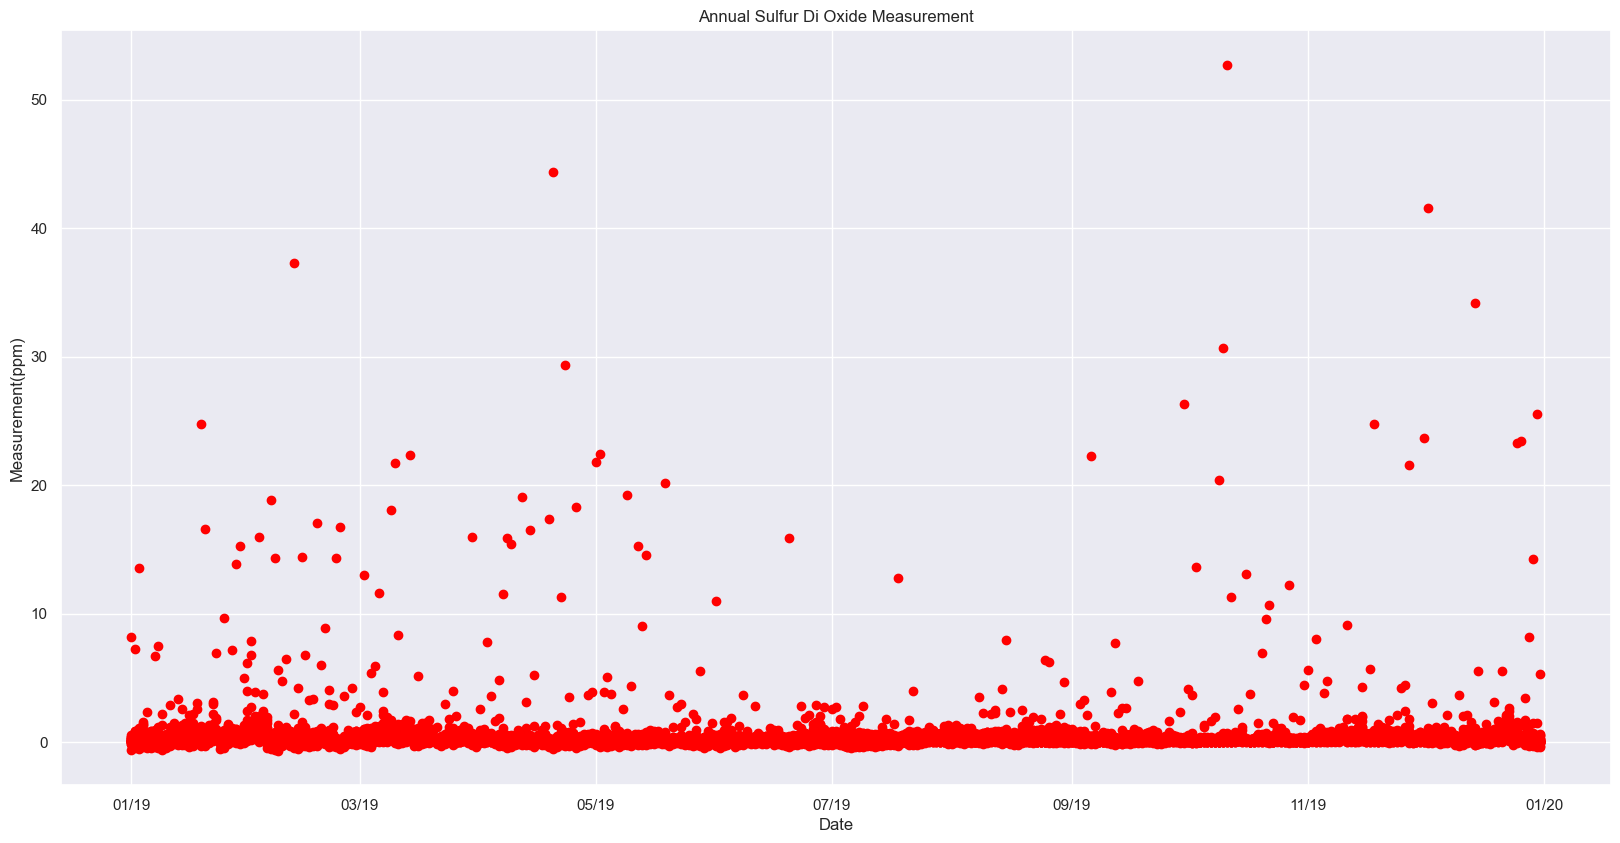

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(sulfurDiOxide2019New['date_local'],
       sulfurDiOxide2019New['arithmetic_mean'],
       color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Measurement(ppm)",
       title="Annual Sulfur Di Oxide Measurement")

# Define the date format
date_form = DateFormatter("%m/%y")
ax.xaxis.set_major_formatter(date_form)

plt.show()

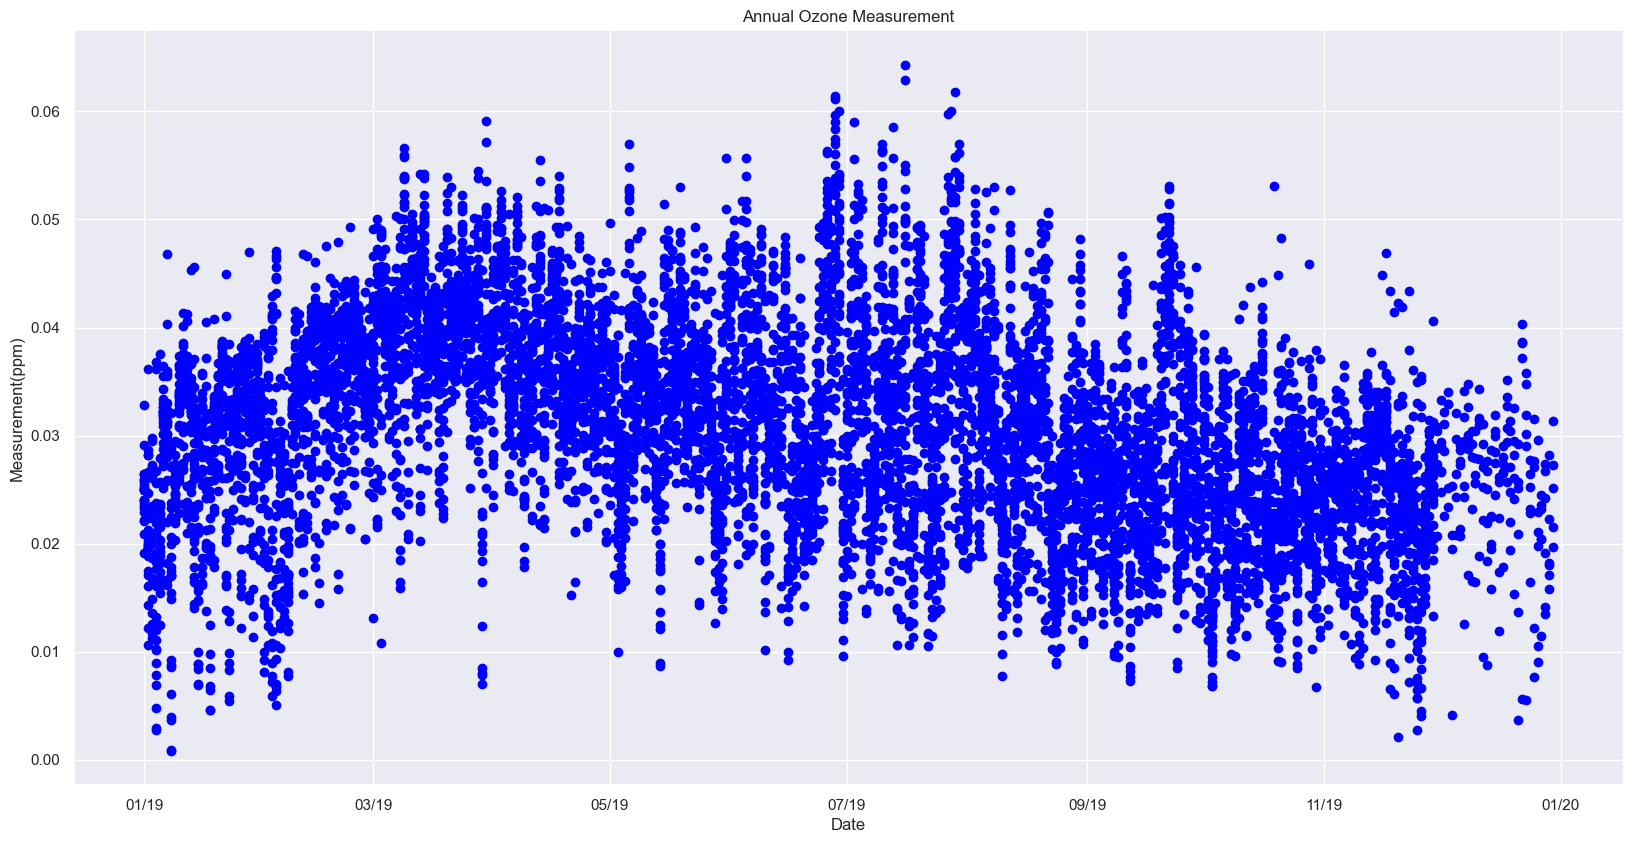

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(ozoneData2019New['date_local'],
       ozoneData2019New['arithmetic_mean'],
       color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Measurement(ppm)",
       title="Annual Ozone Measurement")

# Define the date format
date_form = DateFormatter("%m/%y")
ax.xaxis.set_major_formatter(date_form)

plt.show()

In [18]:
#removing outliers using robust z-score

def checkAndRemoveOutliers(dataFrame,columnName):
    med=np.median(dataFrame[columnName])
    ma = stats.median_abs_deviation(dataFrame[columnName])
    mad=np.median(ma)
    dataFrame = dataFrame.query("(((0.6745*({0}-@med))/@mad)<3) & (((0.6745*({0}-@med))/@mad)>-3)".format(columnName))
    return dataFrame
    


sulfurDiOxide2019New=checkAndRemoveOutliers(sulfurDiOxide2019New,'arithmetic_mean')
sulfurDiOxide2019New=checkAndRemoveOutliers(sulfurDiOxide2019New,'first_max_value')


ozoneData2019New=checkAndRemoveOutliers(ozoneData2019New,'arithmetic_mean')
ozoneData2019New=checkAndRemoveOutliers(ozoneData2019New,'first_max_value')

carbonMonoOxide2019New=checkAndRemoveOutliers(carbonMonoOxide2019New,'arithmetic_mean')
carbonMonoOxide2019New=checkAndRemoveOutliers(carbonMonoOxide2019New,'first_max_value')

NitrogenDiOxide2019New=checkAndRemoveOutliers(NitrogenDiOxide2019New,'arithmetic_mean')
NitrogenDiOxide2019New=checkAndRemoveOutliers(NitrogenDiOxide2019New,'first_max_value')

TemperatureDfNew=checkAndRemoveOutliers(TemperatureDfNew,'arithmetic_mean')
TemperatureDfNew=checkAndRemoveOutliers(TemperatureDfNew,'first_max_value')

TemperatureDfNew=checkAndRemoveOutliers(TemperatureDfNew,'arithmetic_mean')
TemperatureDfNew=checkAndRemoveOutliers(TemperatureDfNew,'first_max_value')
 


print("Sulfur Shape : " + str(sulfurDiOxide2019New.shape)) 
print("Ozone Shape : " + str(ozoneData2019New.shape))
print("NitrogenDiOxide Shape : " + str(NitrogenDiOxide2019New.shape))
print("CarbonMonoOxide Shape : " + str(carbonMonoOxide2019New.shape))
print("Temperature Shape : " + str(TemperatureDfNew.shape))
print("Relative Humidity Shape : "+ str(HumidityDfNew.shape))

Sulfur Shape : (6404, 14)
Ozone Shape : (9615, 14)
NitrogenDiOxide Shape : (2550, 14)
CarbonMonoOxide Shape : (3363, 14)
Temperature Shape : (3108, 14)
Relative Humidity Shape : (1486, 14)


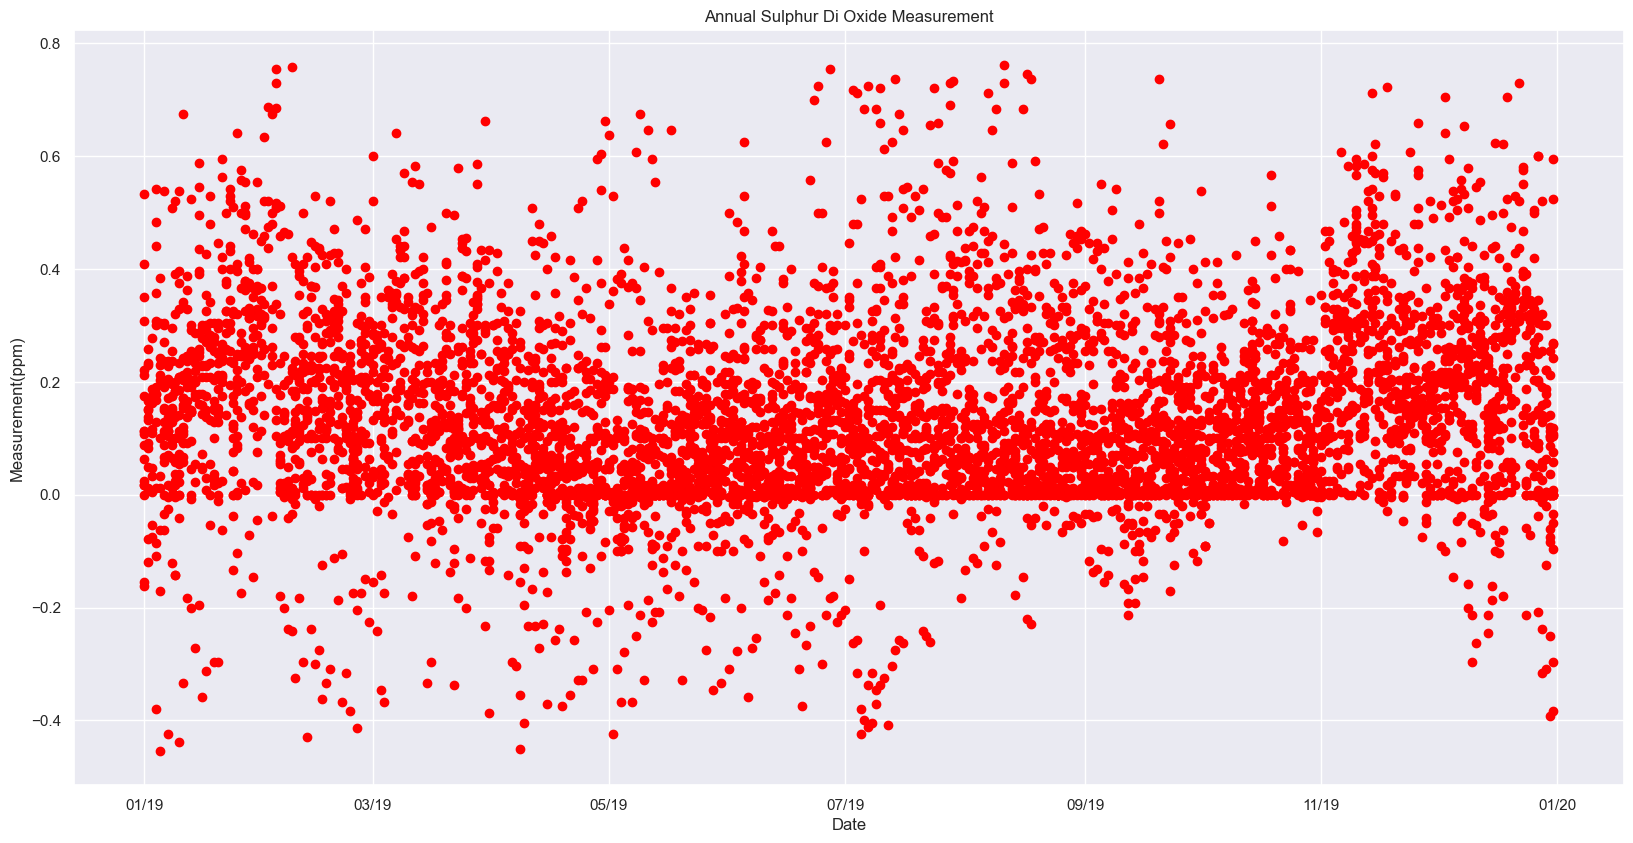

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(sulfurDiOxide2019New['date_local'],
       sulfurDiOxide2019New['arithmetic_mean'],
       color='red')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Measurement(ppm)",
       title="Annual Sulphur Di Oxide Measurement")

# Define the date format
date_form = DateFormatter("%m/%y")
ax.xaxis.set_major_formatter(date_form)

plt.show()

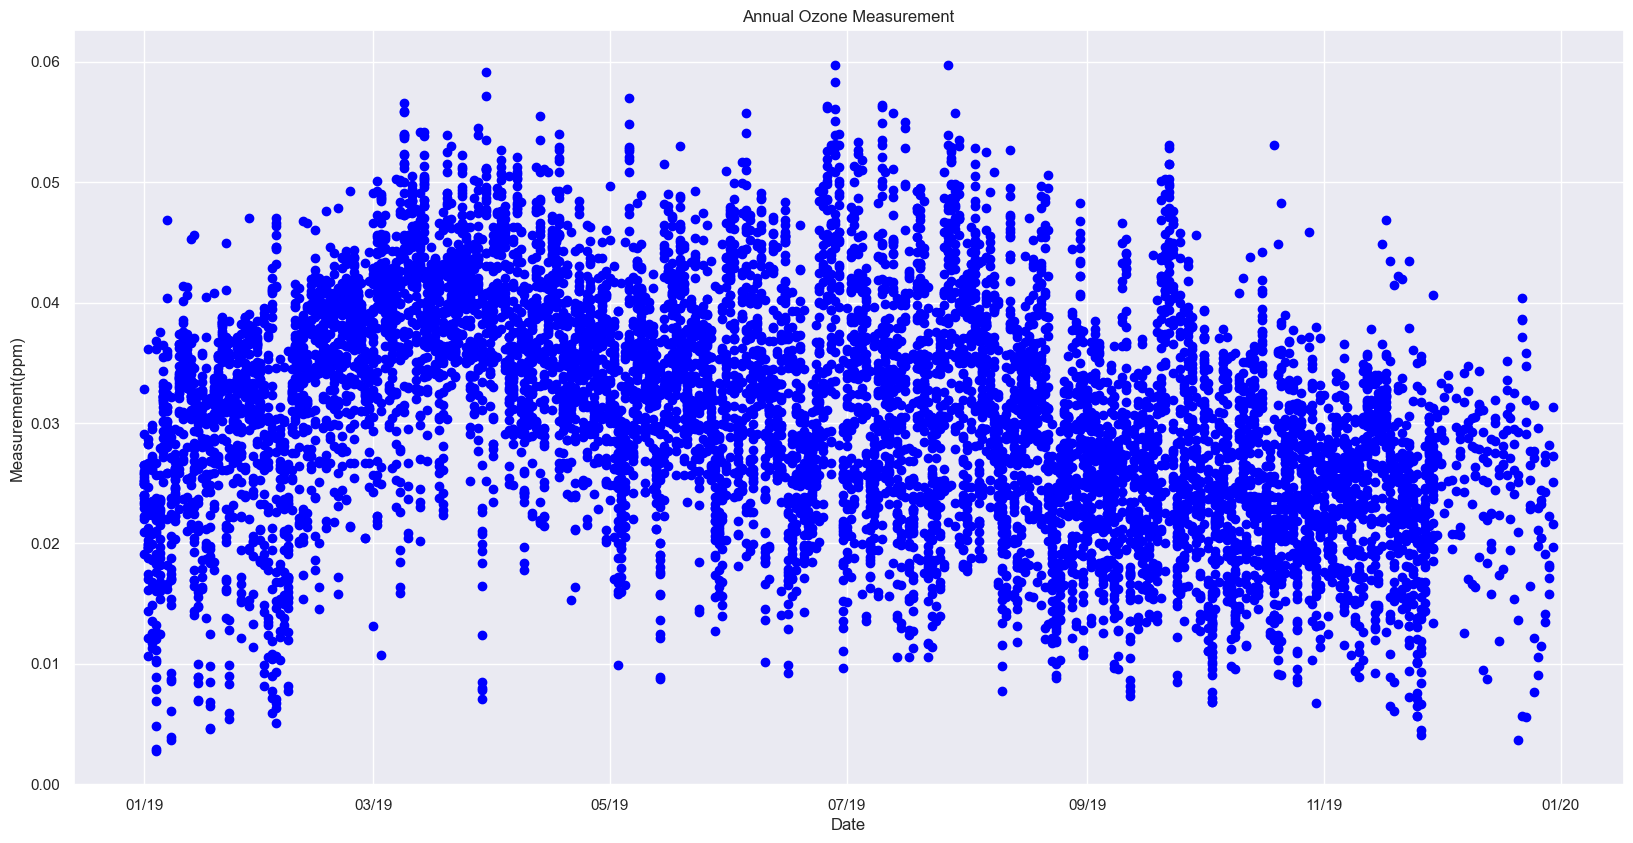

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(ozoneData2019New['date_local'],
       ozoneData2019New['arithmetic_mean'],
       color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Measurement(ppm)",
       title="Annual Ozone Measurement")

# Define the date format
date_form = DateFormatter("%m/%y")
ax.xaxis.set_major_formatter(date_form)

plt.show()

#### 6. Scaling

Our Datasets have values which are very small.So scaling them to larger values. This will be helpful if we choose to use an alogrithm which uses gradient decent in the future.

We are using MinMaxScaler to scale the data in the range of 0 to 10.

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


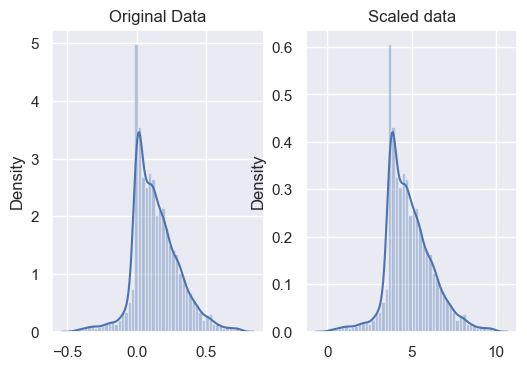

In [21]:
def scaleDataAndPlot(dataFrame, columnName,dataSetName,showPlot):
    scaler = MinMaxScaler(feature_range=(0,10))
    scaled_data = scaler.fit_transform(dataFrame[columnName].to_numpy().reshape(-1,1))
    if(showPlot):
        fig, ax=plt.subplots(1,2)
        sns.distplot(dataFrame[columnName].to_numpy(), ax=ax[0])
        ax[0].set_title("Original Data")
        sns.distplot(scaled_data, ax=ax[1])
        ax[1].set_title("Scaled data")
    dataFrame[columnName]=scaled_data                   
    return dataFrame


sulfurDiOxide2019New=scaleDataAndPlot(sulfurDiOxide2019New,'arithmetic_mean', "SulfurDiOxide Data Set", True)
sulfurDiOxide2019New=scaleDataAndPlot(sulfurDiOxide2019New,'first_max_value',"SulfurDiOxide Data Set", False)


ozoneData2019New=scaleDataAndPlot(ozoneData2019New,'arithmetic_mean',"Ozone Data Set", False)
ozoneData2019New=scaleDataAndPlot(ozoneData2019New,'first_max_value',"Ozone Data Set", False)

carbonMonoOxide2019New=scaleDataAndPlot(carbonMonoOxide2019New,'arithmetic_mean',"CarobonMonoOxide Data Set", False)
carbonMonoOxide2019New=scaleDataAndPlot(carbonMonoOxide2019New,'first_max_value',"CarobonMonoOxide Data Set", False)

NitrogenDiOxide2019New=scaleDataAndPlot(NitrogenDiOxide2019New,'arithmetic_mean',"NitrogenDiOxide Data Set", False)
NitrogenDiOxide2019New=scaleDataAndPlot(NitrogenDiOxide2019New,'first_max_value',"NitrogenDiOxide Data Set", False)




#### 7. Normalize

We would be using some regression algorithm in future phases. So need to normalize the data to get a better fit.You can see the change in histogram below the curve. 

We are using yeojohnson normalization method.

C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


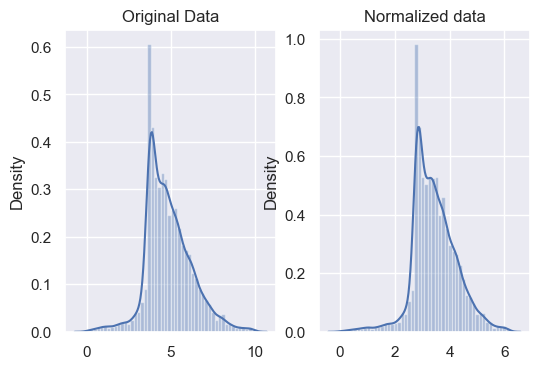

In [22]:
def normalizeDataAndPlot(dataFrame, columnName,dataSetName,showPlot):
    normalized_data = stats.yeojohnson(dataFrame[columnName])
    if(showPlot):
        fig, ax=plt.subplots(1,2)
        sns.distplot(dataFrame[columnName].to_numpy(), ax=ax[0])
        ax[0].set_title("Original Data")
        sns.distplot(normalized_data[0], ax=ax[1])
        ax[1].set_title("Normalized data")
    dataFrame[columnName]=normalized_data[0]                   
    return dataFrame


sulfurDiOxide2019New=normalizeDataAndPlot(sulfurDiOxide2019New,'arithmetic_mean', "SulfurDiOxide Data Set", True)
sulfurDiOxide2019New=normalizeDataAndPlot(sulfurDiOxide2019New,'first_max_value',"SulfurDiOxide Data Set", False)


ozoneData2019New=normalizeDataAndPlot(ozoneData2019New,'arithmetic_mean',"Ozone Data Set", False)
ozoneData2019New=normalizeDataAndPlot(ozoneData2019New,'first_max_value',"Ozone Data Set", False)

carbonMonoOxide2019New=normalizeDataAndPlot(carbonMonoOxide2019New,'arithmetic_mean',"CarobonMonoOxide Data Set", False)
carbonMonoOxide2019New=normalizeDataAndPlot(carbonMonoOxide2019New,'first_max_value',"CarobonMonoOxide Data Set", False)

NitrogenDiOxide2019New=normalizeDataAndPlot(NitrogenDiOxide2019New,'arithmetic_mean',"NitrogenDiOxide Data Set", False)
NitrogenDiOxide2019New=normalizeDataAndPlot(NitrogenDiOxide2019New,'first_max_value',"NitrogenDiOxide Data Set", False)

TemperatureDfNew=normalizeDataAndPlot(TemperatureDfNew,'arithmetic_mean',"Temperature Data Set", False)
TemperatureDfNew=normalizeDataAndPlot(TemperatureDfNew,'first_max_value',"Temperature Data Set", False)

TemperatureDfNew=normalizeDataAndPlot(TemperatureDfNew,'arithmetic_mean',"Relative Humidity Data Set", False)
TemperatureDfNew=normalizeDataAndPlot(TemperatureDfNew,'first_max_value',"Relative Humidity Data Set", False)

#### 8. Check For NULL Values

Adding a check for null values in the dataset.

In [23]:
def checkNULLValues(dataFrame,dataSetName):
    missingValues=dataFrame.isnull().sum()
    count=0
    nullCount=0
    for i in missingValues:
        count+=1
        if(i>0):
            nullCount+=i
            print( dataFrame.columns[count-1],i)
            
    if(nullCount>0):
        print(dataSetName + " has the above null values")
    else:
        print(dataSetName + " has no null values")
        
    print()    
    return


checkNULLValues(sulfurDiOxide2019New,"SulfurDiOxide")
checkNULLValues(ozoneData2019New,"Ozone")
checkNULLValues(NitrogenDiOxide2019New,"NitrogenDiOxide")
checkNULLValues(carbonMonoOxide2019New,"CarbonMonoOxide")
checkNULLValues(HumidityDfNew,"Relative Humdity")
checkNULLValues(TemperatureDfNew,"Temperature")       



SulfurDiOxide has no null values

Ozone has no null values

NitrogenDiOxide has no null values

CarbonMonoOxide has no null values

pollutant_standard 1486
aqi 1486
Relative Humdity has the above null values

pollutant_standard 3108
aqi 3108
Temperature has the above null values



#### 9. Filling Null Values

Since Temperature and humidity are not really pollutants there is not standards defined for them. Filling 
the pollution_standard column with a default value as we don't think it will have an effect on our model later.

Filling the aqi column with the largest aqi value recorded among the other pollutants in that particular county for 
the particular Date.

The AQI index of a particular region is calculated as the max AQI reported among the pollutants in that area.
Reference : https://en.wikipedia.org/wiki/Air_quality_index 
"If multiple pollutants are measured at a monitoring site, then the largest or dominant AQI value is reported for the location."


In [24]:


TemperatureDfNew['pollutant_standard']='Temperature Pollution Standard'
HumidityDfNew['pollutant_standard']='Relative Humidity Pollution Standard'


def fillNullAqiValues(dataFrame):
    for index,row in dataFrame.iterrows():
        oseries=ozoneData2019New[(ozoneData2019New['date_local'] == row['date_local']) & (ozoneData2019New['county']==row['county'])]['aqi']
        if(oseries.empty):
            oaqi=0
        else:
            oaqi= oseries.max()

        cseries=carbonMonoOxide2019New[(carbonMonoOxide2019New['date_local'] == row['date_local']) & (carbonMonoOxide2019New['county']==row['county'])]['aqi']
        if(cseries.empty):
            coaqi=0
        else:
            coaqi= cseries.max()

        noseries=NitrogenDiOxide2019New[(NitrogenDiOxide2019New['date_local'] == row['date_local']) & (NitrogenDiOxide2019New['county']==row['county'])]['aqi']
        if(noseries.empty):
            noaqi=0
        else:
            noaqi= noseries.max()

        soseries=sulfurDiOxide2019New[(sulfurDiOxide2019New['date_local'] == row['date_local']) & (sulfurDiOxide2019New['county']==row['county'])]['aqi']
        if(soseries.empty):
            soaqi=0
        else:
            soaqi= soseries.max()
        
        maxAqi=max(oaqi,coaqi,noaqi,soaqi) 
        dataFrame.at[index,'aqi']=maxAqi
    
    return dataFrame

TemperatureDfNew=fillNullAqiValues(TemperatureDfNew)
HumidityDfNew=fillNullAqiValues(HumidityDfNew)

#check for null values again

checkNULLValues(HumidityDfNew,"Relative Humdity")
checkNULLValues(TemperatureDfNew,"Temperature")    

Relative Humdity has no null values

Temperature has no null values



#### PLEASE WAIT FOR THE PREVIOUS OPERATION TO FINISH. IT WILL PRINT A MSG.

#### 10. Merging Data Sets into One Data Set

Merging the datasets into a single dataset.

In [25]:
df=pd.concat([ozoneData2019New,sulfurDiOxide2019New,NitrogenDiOxide2019New,carbonMonoOxide2019New,HumidityDfNew, TemperatureDfNew], ignore_index=True)

print(df.shape)

df.describe()

(26526, 14)


,site_number,arithmetic_mean,first_max_value,aqi,latitude,longitude
count,26526.000000,26526.000000,26526.000000,26526.000000,26526.000000,26526.000000
mean,630.182462,14.645426,16.419458,20.602805,42.156093,-75.322827
std,1792.588063,25.387933,31.903684,18.504957,1.181859,1.991591
min,2.000000,-7.610265,-2.773392,0.000000,40.580270,-79.318810
25%,5.000000,3.049780,1.795825,0.000000,40.867900,-77.209780
50%,12.000000,4.181619,2.815468,23.000000,42.091420,-74.198320
75%,133.000000,6.243080,4.809473,36.000000,43.145013,-73.817694
max,9991.000000,121.246590,139.702081,93.000000,44.965412,-72.712380


#### 11. Adding New Columns

Adding new columns 'seasons' and 'dayofweek'. This is done because we want to analyze the change in air quality index with respect to the seasons. Also, we would like to analyze the change in air quality every day of the week

In [26]:
#adding new columns which we will be using for EDA and as features in the next phases

# march-may -spring
# june-august- summer
# september to november -fall
# november to feb- winter

df['seasons']=""
df['dayofweekNo']=df['date_local'].dt.dayofweek
df['dayofWeek']=""

for index,row in df.iterrows():
    if(row['date_local'].month in [3,4,5]):
        df.at[index,'seasons']='Spring'
    elif(row['date_local'].month in [6,7,8]):
        df.at[index,'seasons']='Summer'
    elif(row['date_local'].month in [9,10,11]):
        df.at[index,'seasons']='Fall'
    elif(row['date_local'].month in [12,1,2]):
        df.at[index,'seasons']='Winter'
    
    df.at[index,'dayofWeek']=calendar.day_name[row['dayofweekNo']]
    


del df['dayofweekNo']
        
print(df.shape)
    

(26526, 16)


#### PLEASE WAIT FOR THE PREVIOUS OPERATION TO FINISH. IT WILL PRINT THE SHAPE OF THE DATAFRAME.

In [27]:
df.to_csv('data/CleanedData.csv')